# Haritesh Rathod

# Task 4

# Exploratory Data Analysis - Terrorism

*In this task we have to perform EDA on Terrorist Activities prevailing all over the world.

# Iporting the Libraries

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading The Dataset

In [4]:
terror = pd.read_csv('C:/Users/joker/Desktop/Hari-Projecs/sparks/globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')

Considering Only The Required Attributes

In [5]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [6]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [7]:
print('Country wth Highest Terrorist Attacks:', terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:', terror['Region'].value_counts().index[0])
print('Maximum people killed in an attck are:', terror['Killed'].max(), 'that took place in', terror.loc[terror['Killed'].idxmax()].Country)

Country wth Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attck are: 1570.0 that took place in Iraq


# Visualizing the Data

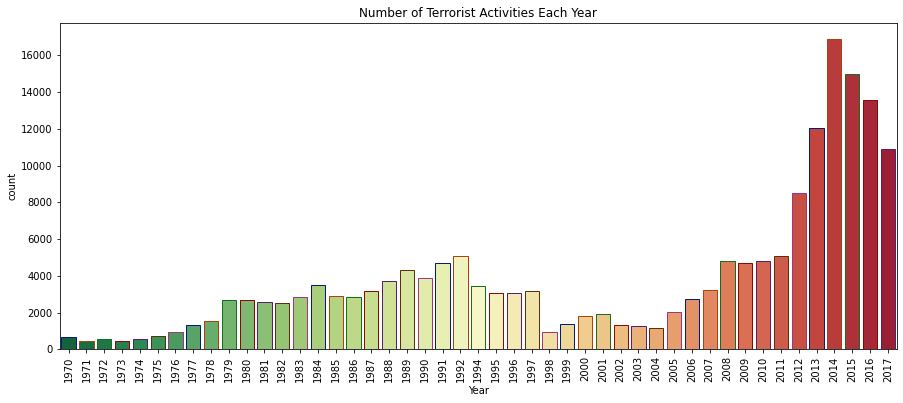

In [8]:
plt.subplots(figsize=(15,6))
sns.countplot('Year', data = terror, palette = 'RdYlGn_r', edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Number of Terrorist Activities Each Year')
plt.show()

From the above plot we can see that there is a rise in Terrorist Acivities from year 2000.

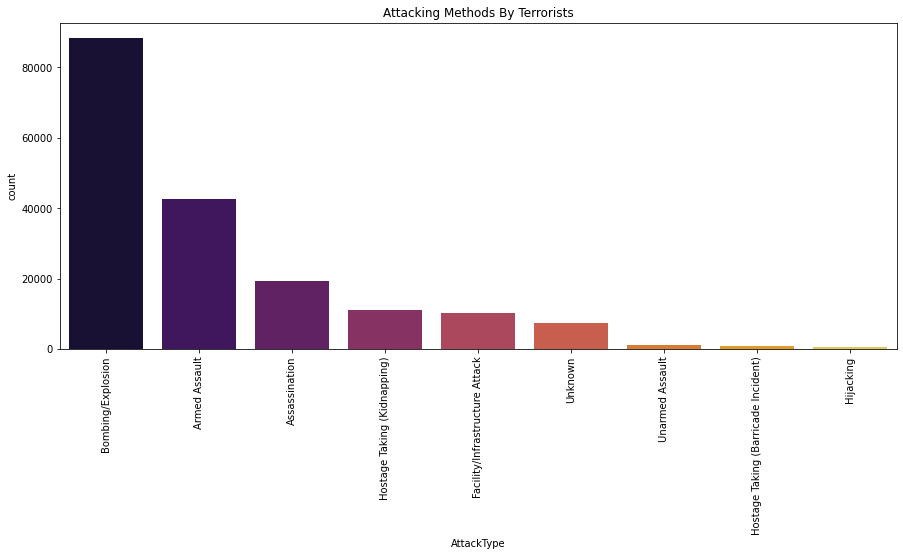

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType', data = terror, palette = 'inferno', order = terror['AttackType'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Attacking Methods By Terrorists')
plt.show()

The most common technique for execution of terrorist attacks is Bombing or Explosion.

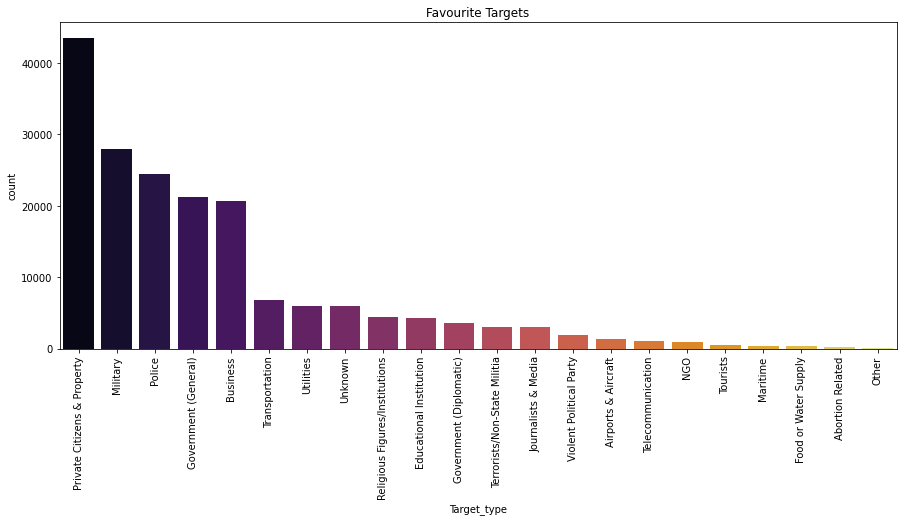

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'], palette = 'inferno', order = terror['Target_type'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Favourite Targets')
plt.show()

From the above plot we see that there is a major threat to Private Citizens and Property in Terrorist Attacks.

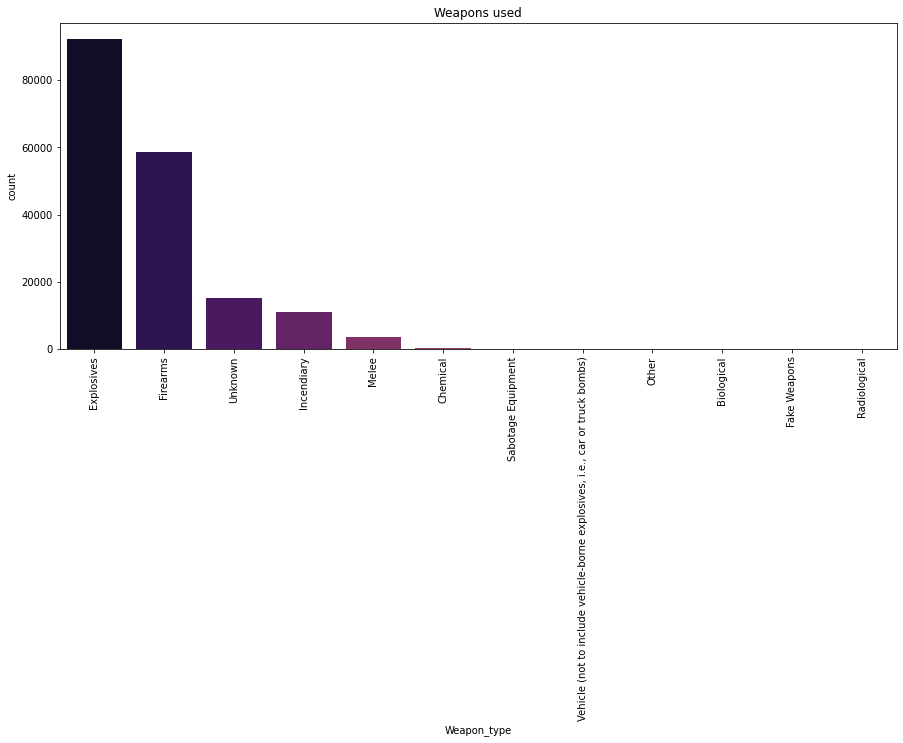

In [11]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Weapon_type'], palette = 'inferno', order = terror['Weapon_type'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Weapons used')
plt.show()

# Terrorism By Region

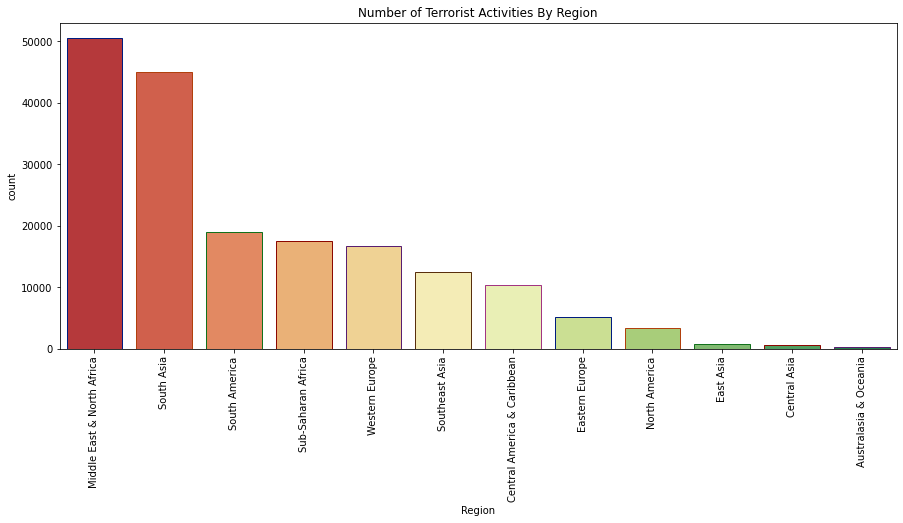

In [12]:
plt.subplots(figsize=(15,6))
sns.countplot('Region', data = terror, palette = 'RdYlGn', edgecolor = sns.color_palette('dark', 7), order = terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of Terrorist Activities By Region")
plt.show()

The major Terrorist Activities takes place in Middle East and North Africa.

* Trend in terrorist Activities

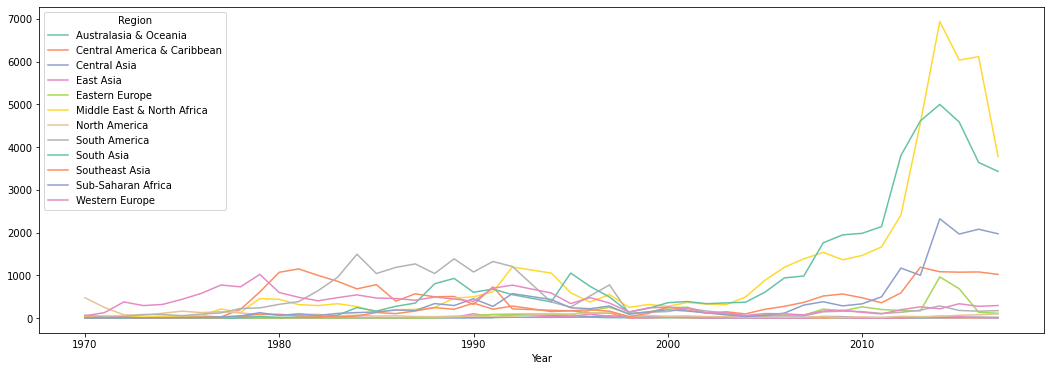

In [13]:
terror_region = pd.crosstab(terror.Year, terror.Region)
terror_region.plot(color = sns.color_palette('Set2',12))
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Attack Type vs region

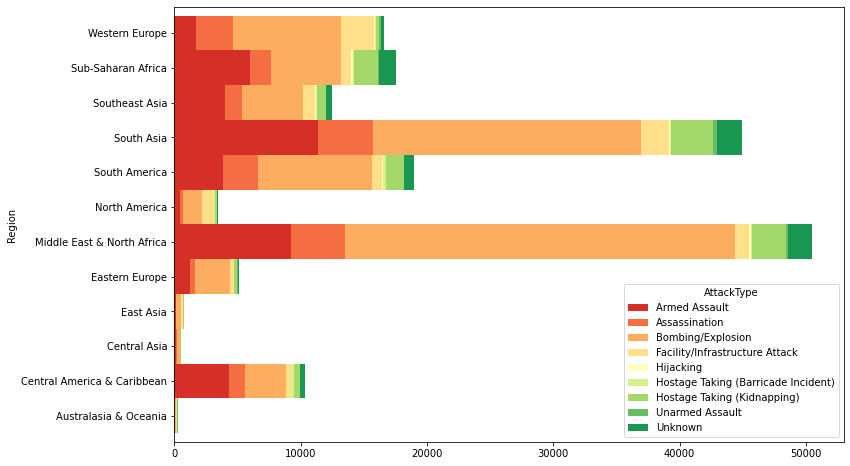

In [14]:
pd.crosstab(terror.Region, terror.AttackType).plot.barh(stacked = True, width = 1, color = sns.color_palette('RdYlGn', 9))
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Terrorism By Country

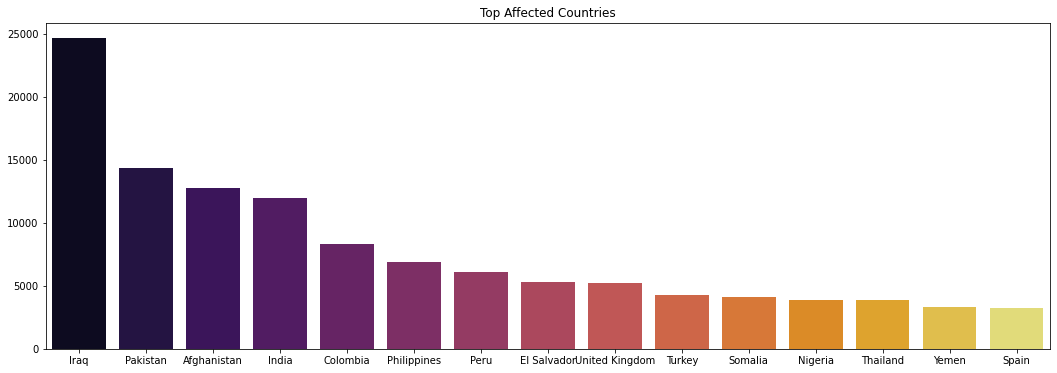

In [15]:
plt.subplots(figsize = (18,6))
sns.barplot(terror['Country'].value_counts()[:15].index, terror['Country'].value_counts()[:15].values, palette = 'inferno')
plt.title('Top Affected Countries')
plt.show()

The Country with most Terrorist Attacks is Iran followed Pakistan , Afganistan and India.

Attack vs Killed

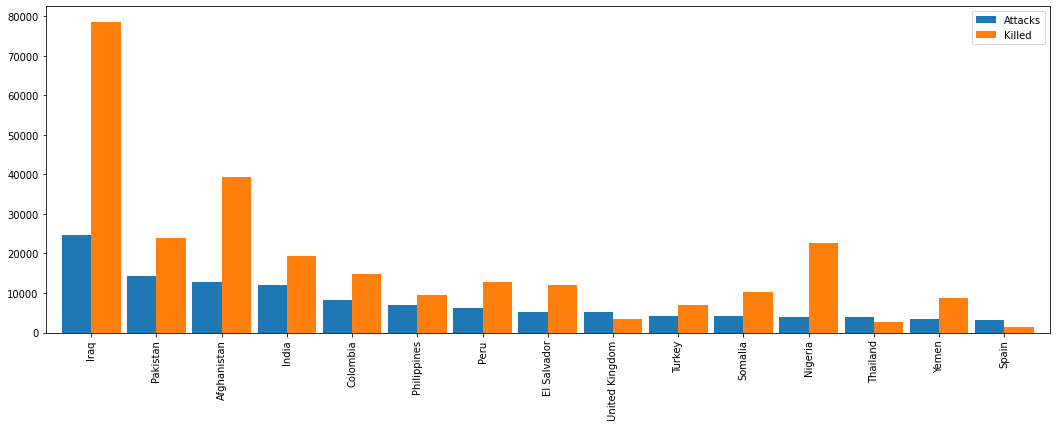

In [16]:
coun_terror=terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

There have been approximately 25000 Terrorist Attacks in Iran with about upto 80000 people Killed.

Most Dngerous Group

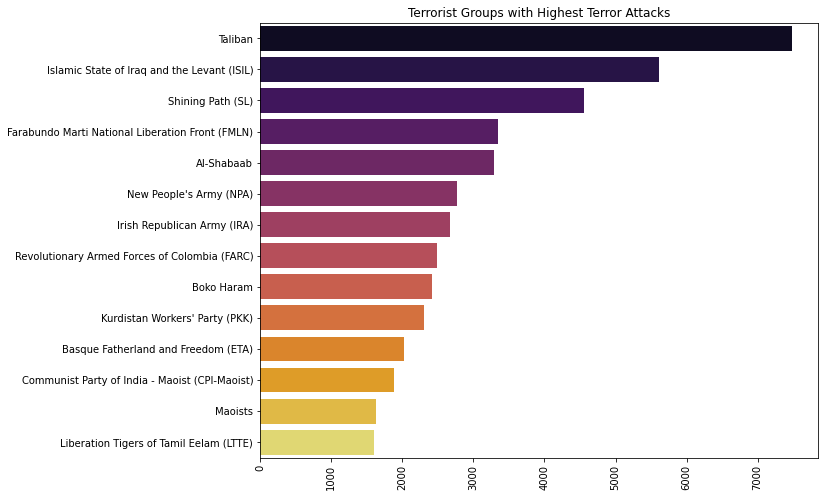

In [17]:
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

The most Dangerous Terrorist group is Taliban followed by ISIL.

Activity of Top Terorist Groups

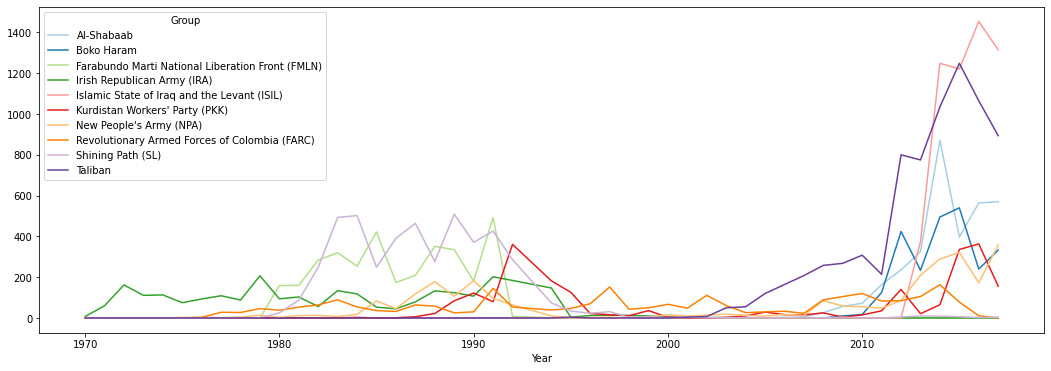

In [18]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()